<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Мария, рад приветствовать ВАС! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху Ваших знаний - свой опыт, что бы Вы могли использовать его для Вашего дальнейшего успеха)
<br>
</font>
<br>

</font>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 
Для начала импортируем библиотеки и получим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

from pymystem3 import Mystem
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data.head(10)
#посмотрим первые 10 строчек таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [4]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,"3,550,000.00",35.30,2018-02-28T00:00:00,1,2.86,15.00,16.30,4,NaN,False,False,9.10,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00
23690,3,"5,500,000.00",52.00,2018-07-19T00:00:00,2,nan,5.00,31.00,2,NaN,False,False,6.00,nan,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,nan,15.00
23691,11,"9,470,000.00",72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,False,10.60,1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,nan,1.00,806.00,519.00
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,nan,5.00,17.50,4,NaN,False,False,6.00,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00
23693,9,"4,600,000.00",62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,False,8.00,0.00,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Для дальнейшего анализа приведем данные представленной таблицы впорядок, проверим пропущенные значения (которых очень много), проверим на наличии дубликатов, изменим типы данных и категоризуем их. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Хорошее начало)<br>
Действительно, очень хорошая привычка - ставить точку в конце шага. <br>

<br>
</font>

### Шаг 2. Предобработка данных
Обработаем данные для дальнейшего анализа и выполнения поставленных задач.

In [7]:
#посмотрим на суммарное количество пропусков
data.isnull().sum()
#далее будем рассматривать только те столбцы, которые нам необходимы

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#посмотрим теперь в процентом соотношении. 
data.isnull().sum().sort_values()/data.shape[0]*100

total_images            0.00
open_plan               0.00
floor                   0.00
rooms                   0.00
studio                  0.00
total_area              0.00
last_price              0.00
first_day_exposition    0.00
locality_name           0.21
floors_total            0.36
living_area             8.03
kitchen_area            9.61
days_exposition        13.42
ponds_around3000       23.28
parks_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ceiling_height         38.80
balcony                48.61
ponds_nearest          61.56
parks_nearest          65.91
is_apartment           88.29
dtype: float64

In [9]:
#переименуем столбцы и приведем названия столбцов к единому регитру: 
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [10]:
names = ['total_images',
 'price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'citycenters_nearest',
 'parks_around_3km', 
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest',
 'days_exposition']
data.set_axis(names, axis='columns', inplace=True)

In [11]:
data.columns.tolist()

['total_images',
 'price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'citycenters_nearest',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest',
 'days_exposition']

Предположительно, пропуски возникли потому что люди могут просто не знать такие вещи как удаленность квартиры от парка или пруда или число парков и прудов в районе их квартиры и т.д. 
Далее рассмотрим только те столбцы, которые нам необходимы для решения задач (это практически все =)).

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Да, это точно не знают.<br>
И там, кажется, робот должен был подставить сам...<br>
Но, видимо, сбои какие-то...
</font>

In [12]:
#по логике мы можем заменить пропуски в столбце "balcony", 
#логично предположить, что пропуск в этом столбце - может означать, что балкона нет
#заменим пропуск на 0.
data['balcony'] = data['balcony'].fillna(0)

In [13]:
data['balcony'].value_counts().sort_values()

3.00       81
4.00      183
5.00      304
2.00     3659
1.00     4195
0.00    15277
Name: balcony, dtype: int64

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
ОК, заменили на 0,т.к. предположили, что люди не заполняли анкету по этому пункту<br>
потому что у них нет балкона.<br>
А если сделать другое предположение:<br>
Балконы есть, просто люди забыли проставить в анкетах. Тогда надо чем-то заполгнять пропуски. Например, проанализировав данные на предмет "номер этажа - есть балкон/нет балкона" и если вероятность наличия балкона на каком-либо этаже - высока, то и основную выборку маркировали "1"<br><br>
Это пример того, как изначальная предпосылка может менять весь анализ)))<br>
Т.е. предпосылка, на которой аналитик строит фундамент своего проекта - очень важная и ответсвенная история))))<br>
Вообще, "Аналитик здесь главный", как шутят некоторые.<br>
И можно согласиться с этим. Только и ответсвенность от этого также высокая!!!<br>
Например, если взять проект по медицине. Там от предпосылок зависит результат.<br>
А от результата может зависеть жизнь и здоровье многих людей)
<br>
</font>

In [14]:
#далее рассмотрим столбец locality_name
len(data['locality_name'].unique())

365

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Вот здесь даааа, тучу всего нужно бы понаделать..
<br>
</font>

In [15]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Сходу видно, что не унифицировано заполнение этого столбца. Поселок могут писать как через е, так и через ё. Попробуем привести впорядок этот столбец

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [17]:
len(data['locality_name'].unique())

331

In [18]:
#Ушли 34 дубля. Теперь посмотрим сколько пропусков осталось в этом столбце
data['locality_name'].isnull().sum()

49

Попробуем удалить эти пропуска, ведь даже клиента, который в поисках квартиры, вряд ли заинтересует объявление, в котором не указан населенный пункт.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
В общем-то согласен, ловко Вы с поселками то)<br>

в locality_name есть ещё один недочёт, который может повлиять на выводы: это запись одной и той же локации разными названиями.<br>
Например: деревня кудрово, кудрово, поселок кудрово - было бы правильнее эти вещи также убрать))<br>
Где это может сказаться: например в задаче рассчитать среднюю стоимость квартиры в кудрово.<br>
Ну и вот, тогда приехали....как говорится)))
<br>
</font>

In [19]:
data = data.dropna(subset = ['locality_name'])

In [20]:
data['locality_name'].isnull().sum()

0

In [21]:
#продолжим рассматривать столбцы с большим количеством пропусков:
#'apartment', 'studio', 'open_plan'
data['apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
#Заменяем Nan на False, так как объекты жилой фонд (ПЕРЕФОРМУЛИРОВАТЬ!)
data['apartment'] = data['apartment'].fillna(0)

In [23]:
data['apartment'] = data['apartment'].map({True: 1, False: 0})

In [24]:
#тоже самое сделаем и с остальными столбцами:  'studio', 'open_plan'
data['studio'].unique()

array([False,  True])

In [25]:
data['studio'] = data['studio'].map({True: 1, False: 0})

In [26]:
data['open_plan'].unique()

array([False,  True])

In [27]:
data['open_plan'] = data['open_plan'].map({True: 1, False: 0})

In [28]:
data['apartment'] = data['apartment'].astype('int16')
data['studio'] = data['studio'].astype('int16')
data['open_plan'] = data['open_plan'].astype('int16')

In [29]:
#проверим замену типов данных и устранение пропусков (+привели к целому числу)
data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
команда - проверка результата. Это верная привычка)
<br>
</font>

In [30]:
data.isnull().sum()

total_images                0
price                       0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
apartment                   0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
citycenters_nearest      5511
parks_around_3km         5510
parks_nearest           15586
ponds_around_3km         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Что делать с пропусками следующих столбцов: 
airports_nearest         5534
citycenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
Люди могут просто не обладать информацией по этим данным, но удалять информацию о них некорректно, заменять пропуски mead или средним значением, 0 или каким-то еще - просто исказить информацию. оставим пока их в покое. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Ок, с таким подходом согласен.<br>
Не всегда и надо бороться с пропусками)<br><font color='orange'>
    
Тут критерий - здравый смысл, относительно конечной бизнес-задачи.<br>
Например, есть пропуски в данных, но не понятно чем их заполнить. А если удалить пропущенные строки, то
может удалить ценная инфо по другим столбцам.<br>
    
Пару ещё моментов на обсуждение:<br>
1) По поводу замену медианами - верная идея. суммарно, это меньшая ошибка (ведь когда подставляем какие-то значения, то всегда тем самым сами уже вносим искажения в результат)<br>
Есть один случай, медиана однозначно наврёт. Это когда в данных есть тренд<br>
Это больше подходит к временным рядам, но и сейчас уже можно намотать на ус))<br>
2) Ну и сраузу уж с выбросами: выбросы - конечно же это зло для моделей. НО...<br>
Иногда, правда, случается, что совокупность выбросов образует некий свой кластер данных<br>
И тогда анлитика этого материала может быть ценнейшим кладом<br>
    
<br>
</font>

In [31]:
data["studio"].fillna("unk", inplace=True)

studio_height = data.groupby('studio')['ceiling_height'].median().to_dict()

data["ceiling_height"].fillna(-1, inplace=True)

def mapper(row):
    if row["ceiling_height"] == -1:
        return studio_height[row['studio']]
    return row["ceiling_height"]

data["ceiling_height"] = data.apply(mapper, axis=1)

In [32]:
data.query('studio')['ceiling_height'].isnull().sum()

0

In [33]:
data["apartment"].fillna("unk", inplace=True)

apartment_height = data.groupby('apartment')['ceiling_height'].median().to_dict()

data["ceiling_height"].fillna(-1, inplace=True)

def mapper(row):
    if row["ceiling_height"] == -1:
        return studio_height[row['apartment']]
    return row["ceiling_height"]

data["ceiling_height"] = data.apply(mapper, axis=1)

In [34]:
data.query('apartment')['ceiling_height'].isnull().sum()

0

In [35]:
data["open_plan"].fillna("unk", inplace=True)

apartment_height = data.groupby('open_plan')['ceiling_height'].median().to_dict()

data["open_plan"].fillna(-1, inplace=True)

def mapper(row):
    if row["ceiling_height"] == -1:
        return studio_height[row['open_plan']]
    return row["ceiling_height"]

data["ceiling_height"] = data.apply(mapper, axis=1)

In [36]:
data.query('open_plan')['ceiling_height'].isnull().sum()

0

In [37]:
data['ceiling_height'].isnull().sum()

0

In [38]:
#в таблице представлены следующие параметры в метрах: 
#'airports_nearest', 'cityсenters_nearest', 'parks_nearest', , 'ponds_nearest'. 
#Для удобства переведем метры в километры, унифицируем все в таблице =)

data['airports_distance'] = data['airports_nearest'] / 1000
data['citycenters_distance'] = data['citycenters_nearest'] / 1000
data['parks_distance'] = data['parks_nearest'] / 1000
data['ponds_distance'] = data['ponds_nearest'] / 1000

In [39]:
data.head(5)

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,18.86,16.03,0.48,0.76
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,12.82,18.60,nan,nan
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05


### Вывод
- Определили и заменили пропущенные значения в следующих столбцах: 'balcony', 'ceiling_height', 'locality_name'.
- Унифицировали данные в столбцах: 'locality_name'
- Изменили типы данных в столбцах: 'airports_distance', 'citycenters_distance', 'parks_distance', 'ponds_distance'. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
А вот и вывод подоспел)))<br>
Это я с радостью написал, потому что не у всех подобное есть(((<br>
А, повторюсь, это важно в подобных проектах логически заканчивать блок исследований<br>
 
С выводами идейно - ОК.<br>
Остальное - написал в комментариях
<br>
</font>

### Шаг 3. Посчитайте и добавьте в таблицу

In [40]:
#посчитано и добавлено в таблицу: 
#день недели, месяц и год публикации объявления 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [41]:
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year

In [42]:
data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,day_of_week,month,year
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,18.86,16.03,0.48,0.76,Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,12.82,18.60,nan,nan,Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57,Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23,Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05,Tuesday,June,2018


In [43]:
#посчитаем цену квадратного метра и добавим отдельным столбцом
data['price_per_m2'] = data['price'] / data['total_area']

In [44]:
data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,day_of_week,month,year,price_per_m2
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,18.86,16.03,0.48,0.76,Thursday,March,2019,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,12.82,18.60,nan,nan,Tuesday,December,2018,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57,Thursday,August,2015,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23,Friday,July,2015,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05,Tuesday,June,2018,"100,000.00"


In [45]:
#посчитано и добавлено в таблицу: соотношение жилой и общей площади, 
#а также отношение площади кухни к общей
data['ratio_total_living_area'] = data['living_area'] / data['total_area']
data['ratio_total_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [46]:
#посчитано и добавлено в таблицу: 
#этаж квартиры; варианты — первый, последний, другой
def floor_area(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_area'] = data.apply(floor_area, axis=1)

In [47]:
data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,day_of_week,month,year,price_per_m2,ratio_total_living_area,ratio_total_kitchen_area,floor_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,18.86,16.03,0.48,0.76,Thursday,March,2019,"120,370.37",0.47,0.23,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,12.82,18.60,nan,nan,Tuesday,December,2018,"82,920.79",0.46,0.27,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57,Thursday,August,2015,"92,785.71",0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23,Friday,July,2015,"408,176.10",nan,nan,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05,Tuesday,June,2018,"100,000.00",0.32,0.41,другой


Все поставленные задачи выполнены: 
- посчитано и добавлено в таблицу: цена квадратного метра
- посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Вот, кстати, один из способов заполнить пропуски в кухнях: соотношение жилой и кухни. Надо только добавить расчёты отдельно однушки, двушки.. наверняка есть разница.<br>
    
Выводы - ОК.
<br>
</font>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим гистограммы для каждого параметра.

In [48]:
data[['total_area', 'rooms', 'ceiling_height', 'price']].describe()

,total_area,rooms,ceiling_height,price
count,"23,650.00","23,650.00","23,650.00","23,650.00"
mean,60.33,2.07,2.72,"6,541,126.90"
std,35.66,1.08,0.99,"10,896,399.18"
min,12.00,0.00,1.00,"12,190.00"
25%,40.00,1.00,2.60,"3,400,000.00"
50%,52.00,2.00,2.65,"4,650,000.00"
75%,69.70,3.00,2.70,"6,799,000.00"
max,900.00,19.00,100.00,"763,000,000.00"


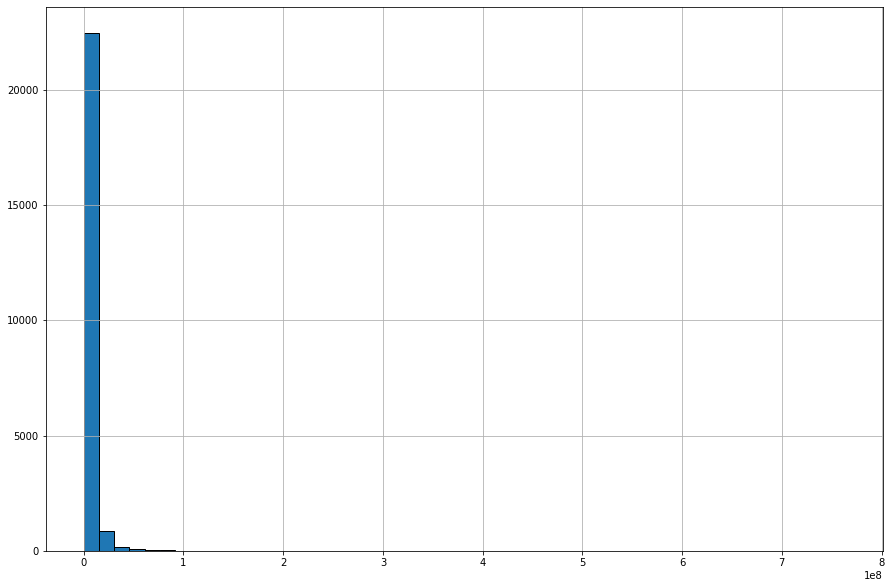

In [49]:
data['price'].hist(bins=50, figsize=(15,10), ec='black')

In [50]:
data['price'].mean()

6541126.897928119

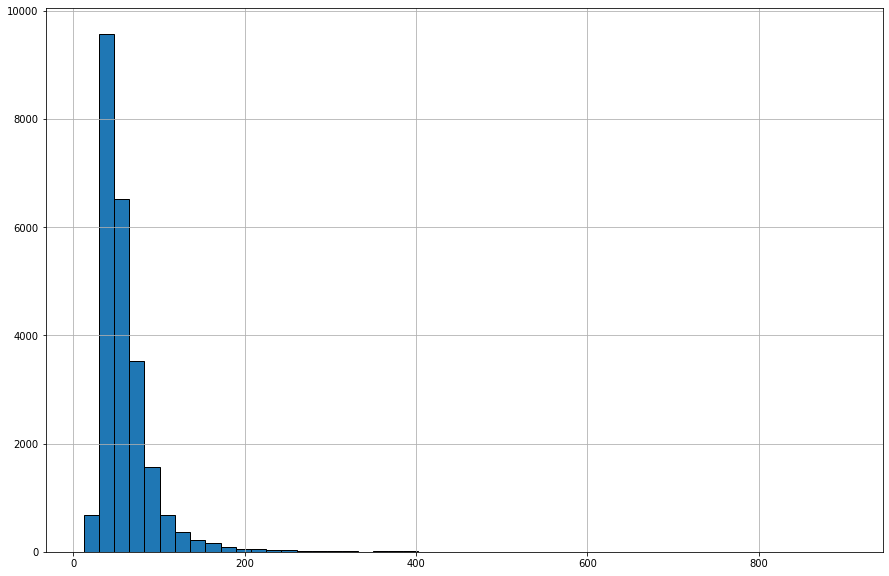

In [51]:
data['total_area'].hist(bins=50, figsize=(15,10), ec='black')

In [52]:
data['total_area'].mean()

60.32906934460889

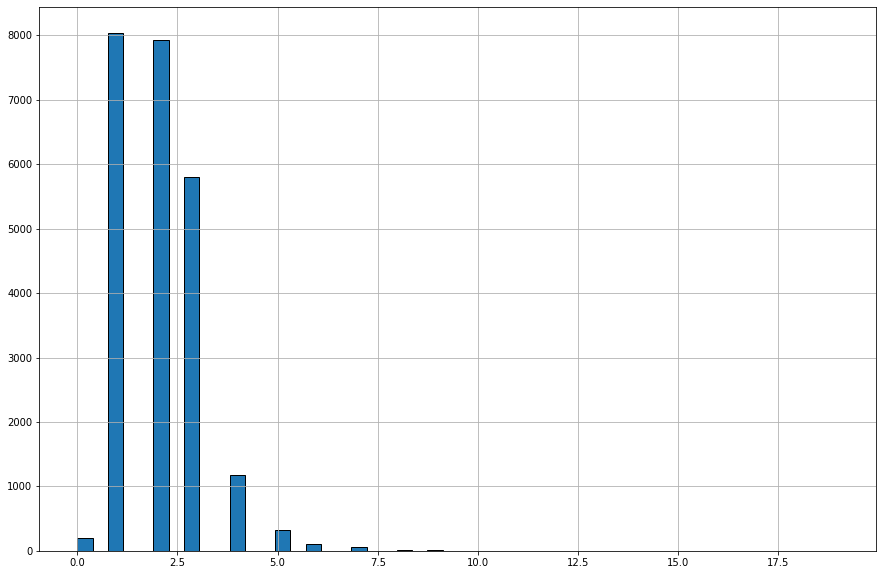

In [53]:
data['rooms'].hist(bins=50, figsize=(15,10), ec='black')

In [54]:
data['rooms'].mean()

2.070105708245243

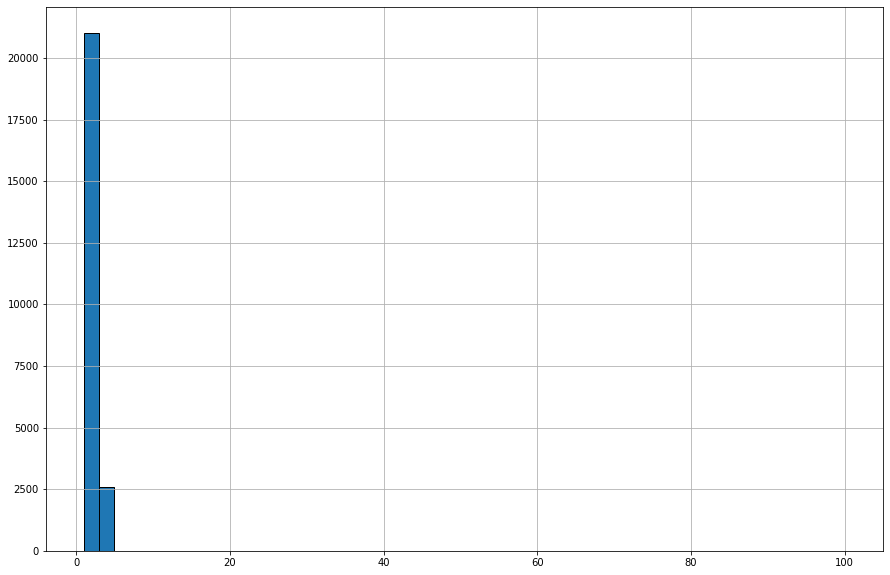

In [55]:
data['ceiling_height'].hist(bins=50, figsize=(15,10), ec='black')

In [56]:
data['ceiling_height'].mean()

2.724463002114165

Предварительный анализ дал следующее, странными данными показались, что есть квартира площадью 12 кв.м., а также 900 кв.м.
Также же вызвало вопрос максимальное значение комнат - 19, хотя при квартире в 900 кв.м., это вполне реально =) 
Обнаружили стоимость квартиры в 12 тысяч рублей, эта стоимость кажется нереальной. В высоте потолков смутили потолки как в 1 метр высоты, так и в 100 метров. При этом средние значения, даже до выбросов, выглядят вполне реальными. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Ок, верные находки. Вопрос, что предлагаете с ними делать?
<br>
</font>

### Уберем редкие и выбивающиеся значения и опишем особенности, которые обнаружили

In [57]:
data.describe()

,total_images,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,year,price_per_m2,ratio_total_living_area,ratio_total_kitchen_area
count,"23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,565.00","21,752.00","23,650.00","23,650.00","23,650.00","23,650.00","21,381.00","23,650.00","18,116.00","18,139.00","18,140.00","8,064.00","18,140.00","9,085.00","20,470.00","18,116.00","18,139.00","8,064.00","9,085.00","23,650.00","23,650.00","21,752.00","21,381.00"
mean,9.86,"6,541,126.90",60.33,2.07,2.72,10.68,34.45,5.89,0.00,0.01,0.00,10.57,0.59,"28,803.23","14,197.86",0.61,490.83,0.77,518.06,180.75,28.80,14.20,0.49,0.52,"2,017.37","99,432.25",0.56,0.19
std,5.68,"10,896,399.18",35.66,1.08,0.99,6.59,22.04,4.88,0.05,0.08,0.05,5.90,0.96,"12,637.31","8,606.83",0.80,342.55,0.94,277.84,219.78,12.64,8.61,0.34,0.28,1.04,"50,337.94",0.11,0.07
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,0.00,0.18,0.00,0.01,"2,014.00",111.83,0.02,0.03
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,18.60,2.00,0.00,0.00,0.00,7.00,0.00,"18,575.75","9,241.00",0.00,288.00,0.00,293.00,45.00,18.58,9.24,0.29,0.29,"2,017.00","76,614.97",0.50,0.13
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,0.00,0.00,0.00,9.10,0.00,"26,756.50","13,105.00",0.00,454.50,1.00,502.00,95.00,26.76,13.11,0.45,0.50,"2,017.00","95,000.00",0.57,0.17
75%,14.00,"6,799,000.00",69.70,3.00,2.70,16.00,42.30,8.00,0.00,0.00,0.00,12.00,1.00,"37,294.00","16,293.00",1.00,612.00,1.00,730.00,231.00,37.29,16.29,0.61,0.73,"2,018.00","114,274.16",0.64,0.23
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,1.00,1.00,1.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00",84.87,65.97,3.19,1.34,"2,019.00","1,907,500.00",1.00,0.79


Рассмотрим значения не во всех столбцах, а только те, которые вызывают вопросы:
- минимальная и максимальная цены в столбце price
- минимальная и максимальная площади в столбце total_area
- минимальная и максимальная высоты потолка в столбце ceiling_height
- минимальная и максимальная площади в столбце kitchen_area
- максимальная стоимость в стобце price_per_m2

Удалим эти выбивающиеся значения

In [58]:
#напишем функцию для дальнейшего удаления выбросов

def del_outliers(data, column,graphic=0,x=10,y=10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outliers = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[outliers].boxplot([column], figsize=(x,y))
    else:
        return data.loc[outliers]

In [59]:
mean_price_outliers = del_outliers(data,'price',0)['price'].mean()
print(mean_price_outliers)
median_price_outliers = del_outliers(data,'price',0)['price'].median()
print(median_price_outliers)

4838942.090946979
4400000.0


(0, 10000000)

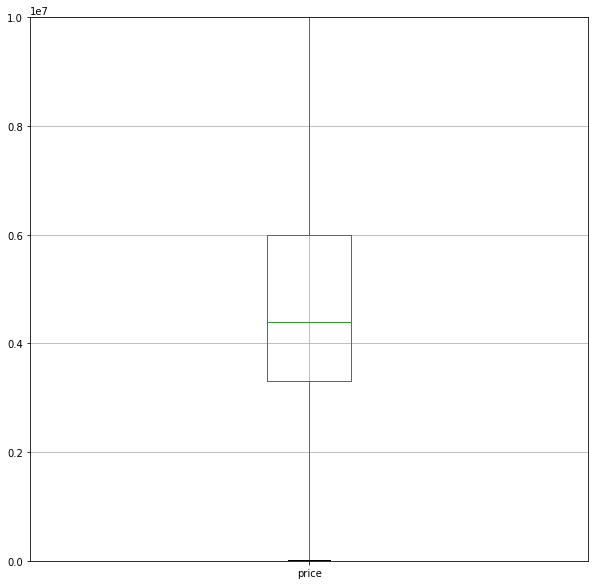

In [60]:
del_outliers(data,'price',1,10,10).set_ylim(0, 10000000)

In [61]:
mean_total_area_outliers = del_outliers(data,'total_area',0)['total_area'].mean()
print(mean_total_area_outliers)
median_total_area_outliers = del_outliers(data,'total_area',0)['total_area'].median()
print(median_total_area_outliers)

54.32568508435241
50.1


(0, 100)

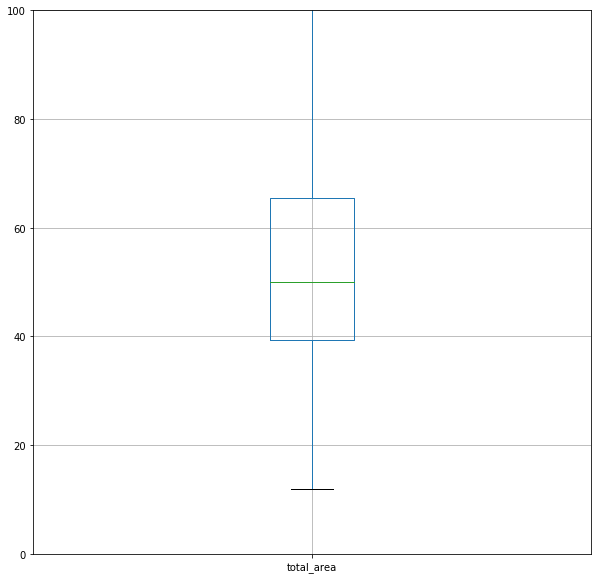

In [62]:
del_outliers(data,'total_area',1,10,10).set_ylim(0, 100)

In [63]:
mean_ceiling_height_outliers = del_outliers(data,'ceiling_height',0)['ceiling_height'].mean()
print(mean_ceiling_height_outliers)
median_ceiling_height_outliers = del_outliers(data,'ceiling_height',0)['ceiling_height'].median()
print(median_ceiling_height_outliers)

2.6312468599033814
2.65


(0, 5)

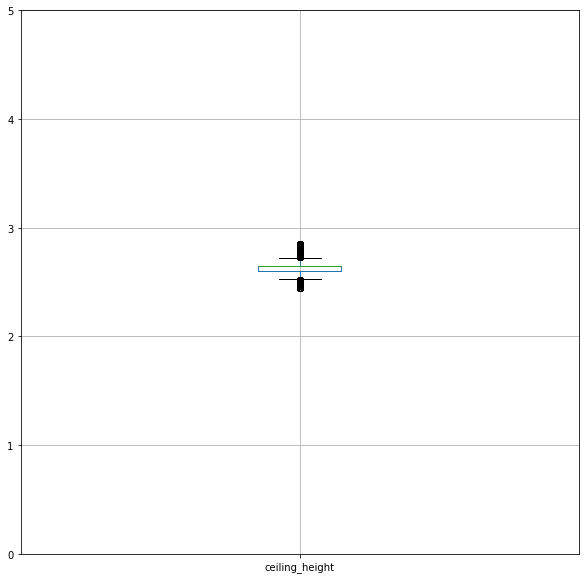

In [64]:
del_outliers(data,'ceiling_height',1,10,10).set_ylim(0, 5)

In [65]:
mean_kitchen_area_outliers = del_outliers(data,'kitchen_area',0)['kitchen_area'].mean()
print(mean_kitchen_area_outliers)
median_kitchen_area_outliers = del_outliers(data,'kitchen_area',0)['kitchen_area'].median()
print(median_kitchen_area_outliers)

9.5097880768469
9.0


(0, 20)

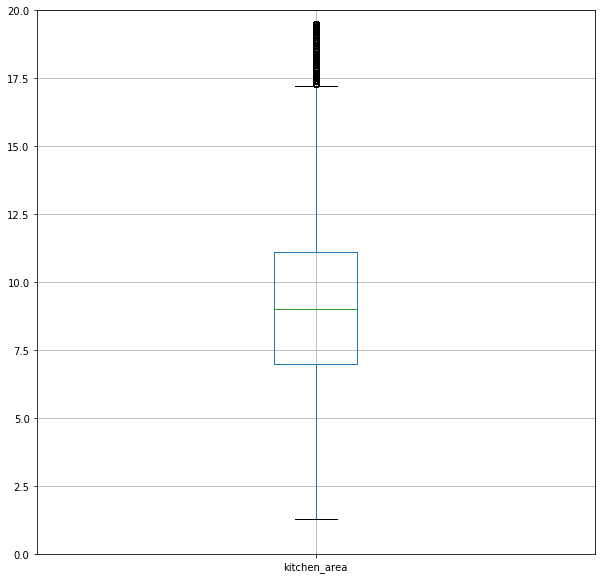

In [66]:
del_outliers(data,'kitchen_area',1,10,10).set_ylim(0, 20)

In [67]:
mean_price_per_m2_outliers = del_outliers(data,'price_per_m2',0)['price_per_m2'].mean()
print(mean_price_per_m2_outliers)
median_price_per_m2_outliers = del_outliers(data,'price_per_m2',0)['price_per_m2'].median()
print(median_price_per_m2_outliers)

93773.45888470388
93913.04347826086


(0, 100000)

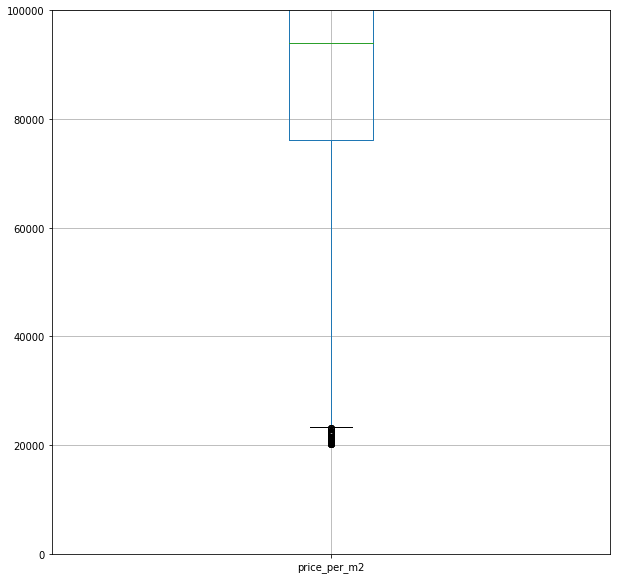

In [68]:
del_outliers(data,'price_per_m2',1,10,10).set_ylim(0, 100000)

Особенности, которые мы увидели в значениях, возможно связаны с ошибкой заполнения, так как средние величины значений выглядят вполне реальными. Выбросы есть, которые мы убрали. 
Также редкие значения, конечно, могут быть связаны с какими-то индивидуальными особенностями квартир. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Идея понятна - убить врага)). И интструмент подходящий - ящик с усами..<br><font color='orange'>

А если в данных, например высота потолка, просто описка. например 25. Тогда очень высока вероятность, что надо просто поставить разделительный знак между 2 и 5.<br>
Это я к тому, что выбросы могут быть разные. И если данных - не так много, и разбрасываться ими - себе дороже, то лучше поробовать побороться за каждую строку))))<br>
    
Ну и ещё одна идея (озвучивал уже) - может выбросы - это что-то особой, что может быть также результатом анализа
<br>
</font>

### Изучим время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 

In [69]:
#Напишем функцию для удаления выбросов

def del_outliers(data, column,graphic=0,x=10,y=10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outliers = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[outliers].boxplot([column], figsize=(x,y))
    else:
        return data.loc[outliers]

In [70]:
data['days_exposition'].describe()

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

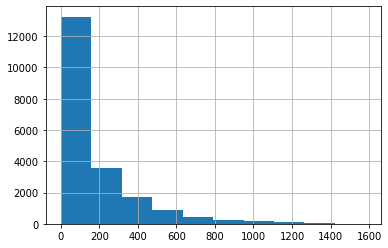

In [71]:
data['days_exposition'].hist()

In [72]:
data['days_exposition'].isnull().sum()

3180

In [73]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [74]:
data['days_exposition'].isnull().sum()

0

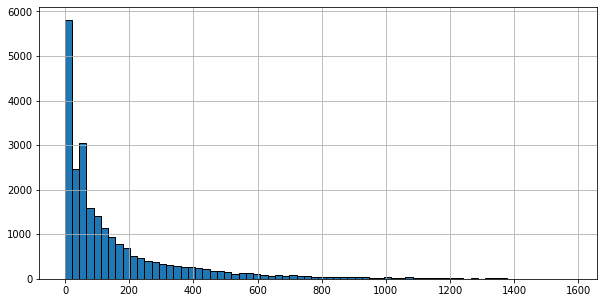

In [75]:
data['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

In [76]:
mean_days_exposition = data['days_exposition'].mean()
print(mean_days_exposition)
median_days_exposition = data['days_exposition'].median()
print(median_days_exposition)

156.31450317124737
73.0


Мы видим, что среднее время продажи - 156 дней, это примерно 5 месяцев, медианное - 73 дня (два с половиной месяца). При этом максимальное количество времени продажи квартиры - 1580 дней (около пяти лет). Скорее всего эти объявления просто не были закрыты после сделки. Также можно отметить, что большая часть квартир продается в первые 50-60 дней. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
да, понятно
<br>
</font>

In [77]:
mean_days_exposition_outliers = del_outliers(data,'days_exposition',0)['days_exposition'].mean()
print(mean_days_exposition_outliers)
median_days_exposition_outliers = del_outliers(data,'days_exposition',0)['days_exposition'].median()
print(median_days_exposition_outliers)

103.55859230484647
61.0


(0, 200)

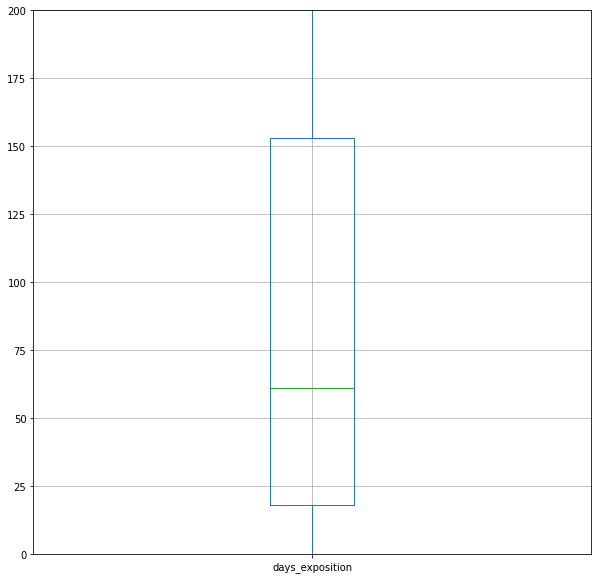

In [78]:
del_outliers(data,'days_exposition',1,10,10).set_ylim(0, 200)

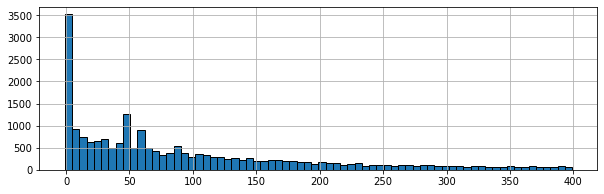

In [79]:
#Попробуем ограничить продажу квартир 400 днями, чтобы посмотреть как будет без выбросов. 
data.query('days_exposition < 400')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Можно сделать вывод, что время до выбросов и после не отличается, остается все прежде, в первые 50-60 дней происходит продажа (пик продаж наблюдается в первую неделю), далее число сделок сокращается, чем дальше по времени, тем меньше. 

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [80]:
top_10_name = data['locality_name'].value_counts().head(10)
print(top_10_name)

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


In [81]:
top_10_name = data['locality_name'].value_counts().index.tolist()[:10]
mean_top_10_price_per_m2 = [data[data['locality_name'] == city]['price_per_m2'].median().round(2) for city in top_10_name]
mean_top_10_price = [data[data['locality_name'] == city]['price'].median() for city in top_10_name]
frame = {'Населенный пункт': top_10_name, 'Средняя цена за кв.м.': mean_top_10_price_per_m2, 'Средняя цена за квартиру': mean_top_10_price}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м.', ascending=False)
dataframe

,Населенный пункт,Средняя цена за кв.м.,Средняя цена за квартиру
0,Санкт-Петербург,"104,761.90","5,500,000.00"
4,Пушкин,"100,000.00","5,180,000.00"
8,деревня Кудрово,"91,860.47","3,790,000.00"
6,поселок Парголово,"91,642.86","4,100,000.00"
1,поселок Мурино,"85,878.46","3,400,000.00"
2,поселок Шушары,"76,876.17","3,950,000.00"
5,Колпино,"74,723.75","3,600,000.00"
7,Гатчина,"67,796.61","3,100,000.00"
3,Всеволожск,"65,789.47","3,450,000.00"
9,Выборг,"58,158.32","2,897,000.00"


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Вот, здесь как раз и будет небольшая неточность в выводах.<br>
То, что писал в самом начале о названии локаций..<br>
Питер, наверняка останется на первом месте. А вот остаьные позиции - могут и измениться, если скорректировать названия локаций
<br>
    
Идейно с подходм анализа согласен
<br>
</font>

Как и предполагалось, в Санкт-Петербурге самые дорогие квартиры. 

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [82]:
data.head()

,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,day_of_week,month,year,price_per_m2,ratio_total_living_area,ratio_total_kitchen_area,floor_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,-1.00,18.86,16.03,0.48,0.76,Thursday,March,2019,"120,370.37",0.47,0.23,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,12.82,18.60,nan,nan,Tuesday,December,2018,"82,920.79",0.46,0.27,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,13.93,0.09,0.57,Thursday,August,2015,"92,785.71",0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,6.80,0.08,0.23,Friday,July,2015,"408,176.10",nan,nan,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.10,0.11,0.05,Tuesday,June,2018,"100,000.00",0.32,0.41,другой


In [83]:
correlation_table = data[['price_per_m2',
                   'total_area',
                   'rooms',
                   'citycenters_distance',
                   'floor_area',
                   'days_exposition',
                   'day_of_week',
                   'month',
                   'year']].corr()
correlation_table.style.background_gradient(cmap='coolwarm')

,price_per_m2,total_area,rooms,citycenters_distance,days_exposition,year
price_per_m2,1,0.302202,0.0554705,-0.318099,0.0198198,0.00889412
total_area,0.302202,1,0.758745,-0.231904,0.0966259,-0.0794957
rooms,0.0554705,0.758745,1,-0.184322,0.0786018,-0.0546411
citycenters_distance,-0.318099,-0.231904,-0.184322,1,-0.0442073,0.0302172
days_exposition,0.0198198,0.0966259,0.0786018,-0.0442073,1,-0.614516
year,0.00889412,-0.0794957,-0.0546411,0.0302172,-0.614516,1


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Это даже красивее, чем тепловая карта выглядит)
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='orange'>
ВАЖНО!!! по использованию корреляций<br>
0) Этот инструмент - исключительно для данных в количественной шкале!!!!<br>
Показатель "год" - он тоже в количественной. Но как интерпретировать результат?<br>
Этот показатель, скорее всего, лучше интерпретировать как номинальная шкала (тут-то всего сколько годов - не боле 6-8)<br>
И тогда, чтобы, анализировать среднюю цены квартиры, например, удобно и более понятно использовать другу технику - сравнение групп (из темы "проверка гипотез" - в будущем у Вас будет).<br><br>
1) Наряду с силой связи, есть ещё характертеристика уровня значимости. Т.е. на сколько выявленной связи можно доверять (это теория р-уровня значений. Ещё будете изучать. Советую (если не очень пока знаете что это) попытать наставника по этому вопросу) <br>

2) Вы уже чётко видите разницу между средним и медианой (опираюсь на Ваш проект)<br>
Потому знаете, что данные имеют склонность быть нормальными и ненормальными (вот ёлки, всё как у людей:)))<br>
Этот факт важен при использовании расчётов коэффициента корреляции:<br>
Если данные нормальные - используют критерий Пирсона. если ненормальный - критерий Спирмена)<br>  
Есть ли последствия от "ложного" использования методов? Да - ложные управленческие выводы!!!!   <br><br>
 3) И ещё: корреляция - очень подвержена выбросам. Расчёты могут искажаться, если они есть!!! (ну Вы с этим справились)   
<br>
</font>

In [84]:
def correlation_price(data, column):
    title_dict = {'rooms': 'correlation_price_rooms', 'floor_area': 'correlation_price_floor_area',
                  'citycenters_distance': 'correlation_price_citycenters_distance',
                  'day_of_week':'median_day', 'month': 'median_month',
                  'year': 'median_year'}
    plt.style.use('seaborn-pastel')
    if column == 'floor_area':
        sort_key = 'price'
    else:
        sort_key = column
    if column == 'floor_area':
        fontsize = 12
    else:
        fontsize = 15
    data_corr = data.groupby(column).median()['price'].reset_index().sort_values(by=sort_key)
    plot = data_corr.plot(x=column, y="price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    ax2 = plt.gca()  
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'citycenters_distance':
        plt.xticks(rotation=0)
    return plot

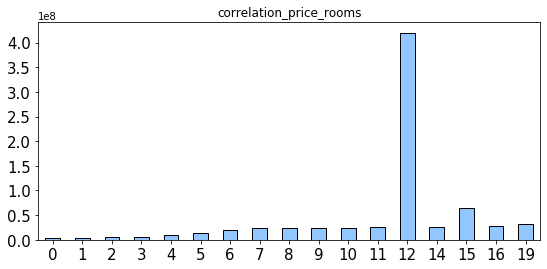

In [85]:
correlation_price(data, 'rooms')

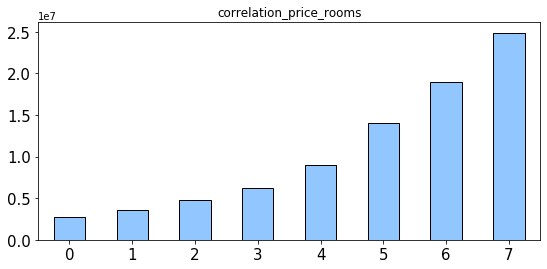

In [86]:
correlation_price(data.query('rooms <= 7'), 'rooms')

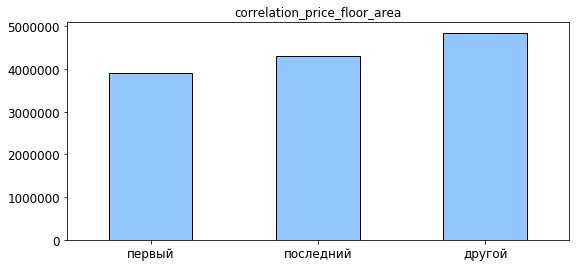

In [87]:
correlation_price(data, 'floor_area')

In [88]:
def corr_price(data, ylims=None):
    price_day_month_year = ['day_of_week', 'month', 'year']
    titles = ['median_day_of_week', 'median_month', 'median_year']

    for i in range(len(price_day_month_year)):
        price_day_month_year_new = data.groupby(price_day_month_year[i]).median()['price'].reset_index().sort_values(by=price_day_month_year[i])
        if ylims is None:
            plot = price_day_month_year_new.plot(x=price_day_month_year[i], y="price", kind='bar', figsize=(10,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = price_day_month_year_new.plot(x=price_day_month_year[i], y="price", kind='bar', figsize=(10,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if price_day_month_year[i] != 'day_of_week':
            plt.xticks(rotation=0)
    return plot

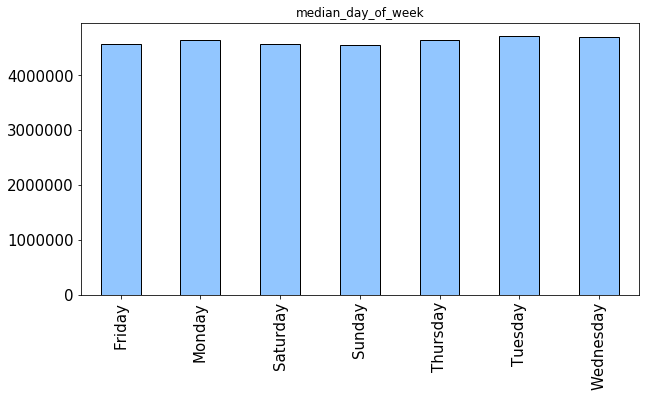

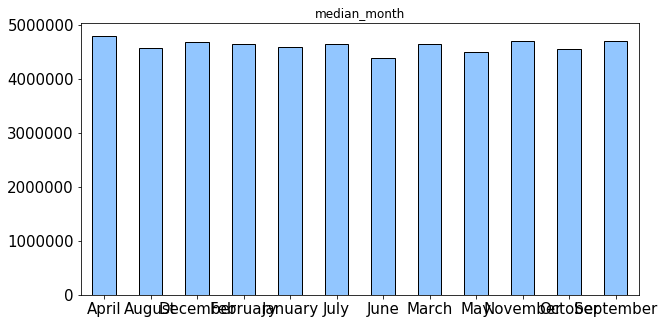

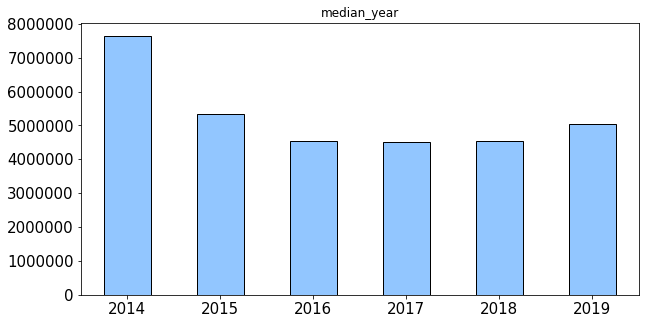

In [89]:
corr_price(data)

Из таблицы мы видим, что на стоимость квадратного метра квартиры больше всего влияют количество комнат и общая площадь. 
Наблюдаем также отрицательную корреляцию между значениеями расстояние квартиры до центра. 
Вывод по графикам: 
1. Чем больше комнат, тем дороже стоимость 
2. Стоимость квартирна первом этаже ниже стоимости квартир на последнем или других этажах. 
3. Цена квартиры никак не зависит от дня недели
4. Наименьшая зависимостьнаблюдается  в июне и мае. Возможно это связано с тем, что покупательская активность в эти месяцы снижена. 
5. Наибольшая зависимость наблюдается в 2014 году, скорее всего это связано с выгодной покупкой для покупателей, ослаблением рубля. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Идейно - ОК, движение в эту сторону))<br><font color='orange'>
ВАЖНО!<br>
с интепретацией выводов о том где что больше/меньше<br>
чтобы это утвержадать для коммерческого использования надо доплнительные расчёты. <br>
А именно: учитывать стандартные отклонения. 
<br>Когда будете изучать тему "проверка гипотез" или сравнение групп, то там Вы сможете ответить на этот вопрос более точно. (если встречали: T-критерий Стьюдента, манна-Уитни...).))))
<br>
</font>

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [90]:
data_piter = data.query('locality_name == "Санкт-Петербург"')
data_piter.loc[:,'citycenters_distance'] = (data_piter.loc[:,'citycenters_nearest']/1000).round()
data_piter.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_images,price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,airports_distance,citycenters_distance,parks_distance,ponds_distance,day_of_week,month,year,price_per_m2,ratio_total_living_area,ratio_total_kitchen_area,floor_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,-1.00,18.86,16.00,0.48,0.76,Thursday,March,2019,"120,370.37",0.47,0.23,другой
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,21.74,14.00,0.09,0.57,Thursday,August,2015,"92,785.71",0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,28.10,7.00,0.08,0.23,Friday,July,2015,"408,176.10",nan,nan,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,31.86,8.00,0.11,0.05,Tuesday,June,2018,"100,000.00",0.32,0.41,другой
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,nan,22,0,0,0,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,-1.00,23.98,12.00,nan,nan,Thursday,April,2019,"110,544.69",nan,0.26,другой


In [91]:
median_piter_price = data_piter.groupby('price').median()
print(median_piter_price)

                total_images  total_area  rooms  ceiling_height  floors_total  \
price                                                                           
12,190.00               7.00      109.00   2.00            2.75         25.00   
1,190,000.00            5.00       14.00   1.00            2.65          5.00   
1,200,000.00            8.00       49.10   4.00            2.50          5.00   
1,350,000.00            1.00       18.80   0.00            2.75         19.00   
1,400,000.00            3.00       13.00   1.00            2.60          9.00   
...                      ...         ...    ...             ...           ...   
300,000,000.00         20.00      618.00   7.00            3.40          7.00   
330,000,000.00         19.00      190.00   3.00            3.50          7.00   
401,300,000.00         15.00      401.00   5.00            2.65          9.00   
420,000,000.00          8.00      900.00  12.00            2.80         25.00   
763,000,000.00         19.00

In [92]:
data_piter['citycenters_distance'].quantile([0.25,0.5,0.75,1])

0.25    8.00
0.50   12.00
0.75   15.00
1.00   29.00
Name: citycenters_distance, dtype: float64

In [93]:
data_piter_center = data_piter.query('citycenters_distance <= 8')
len(data_piter_center)

4122

In [94]:
data_piter_center = data_piter.pivot_table(index = 'price', values = ['price_per_m2', 'citycenters_distance'])
print(data_piter_center.corr())

                      citycenters_distance  price_per_m2
citycenters_distance                  1.00         -0.39
price_per_m2                         -0.39          1.00


In [95]:
data_piter_corr = data.pivot_table(index = 'price', values = ['price_per_m2', 'citycenters_distance'])
print(data_piter.corr())

                          total_images  price  total_area  rooms  \
total_images                      1.00   0.10        0.10   0.08   
price                             0.10   1.00        0.66   0.37   
total_area                        0.10   0.66        1.00   0.76   
rooms                             0.08   0.37        0.76   1.00   
ceiling_height                    0.00   0.07        0.09   0.06   
floors_total                      0.02  -0.06       -0.11  -0.26   
living_area                       0.09   0.57        0.94   0.84   
floor                             0.04  -0.00       -0.04  -0.16   
apartment                         0.00   0.02        0.02  -0.01   
studio                           -0.02  -0.03       -0.06  -0.14   
open_plan                        -0.01  -0.00       -0.02  -0.07   
kitchen_area                      0.10   0.52        0.62   0.29   
balcony                           0.06   0.01       -0.01  -0.04   
airports_nearest                  0.01  -0.01   

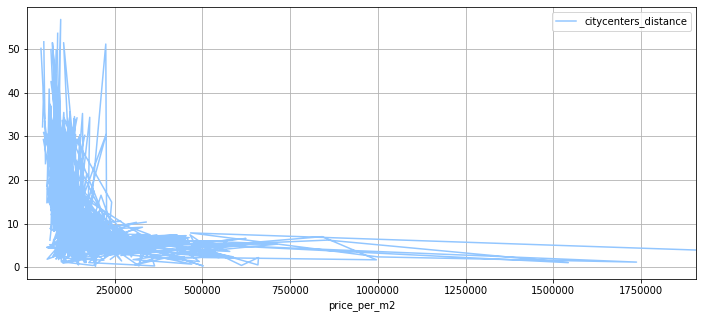

In [96]:
#перестроить гистограмму? 
data_piter_corr.plot(x='price_per_m2', y='citycenters_distance', figsize=(12, 5), grid=True)

Как мы видим по таблицам и гистограмме, чем дальше от центра, тем квартиры дешевле.

### Выделим сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: 
- площадь
- цена 
- число комнат
- высота потолков

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

В предыдущем задании, мы уже обозначили центр <= 8 км, а также узнали сколько объявлений с квартирами в центре (4122). Приступаем к построению графиков: 

In [97]:
center_piter = data_piter[['price',
                   'total_area',
                   'rooms',
                   'ceiling_height',
                   'floor',
                   'days_exposition',
                   'citycenters_distance']]

print(center_piter.head(10))

           price  total_area  rooms  ceiling_height  floor  days_exposition  \
0  13,000,000.00      108.00      3            2.70      8            -1.00   
2   5,196,000.00       56.00      2            2.65      4           558.00   
3  64,900,000.00      159.00      3            2.65      9           424.00   
4  10,000,000.00      100.00      2            3.03     13           121.00   
7   7,915,000.00       71.60      2            2.65     22            -1.00   
9   5,400,000.00       61.00      3            2.50      7           289.00   
10  5,050,000.00       39.60      1            2.67      3           137.00   
15  4,650,000.00       39.00      1            2.65      5            19.00   
16  6,700,000.00       82.00      3            3.05      1           397.00   
17  4,180,000.00       36.00      1            2.65      7           571.00   

    citycenters_distance  
0                  16.00  
2                  14.00  
3                   7.00  
4                   8.

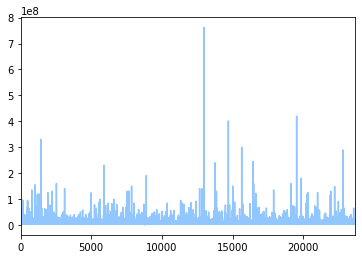

In [98]:
center_piter['price'].plot()

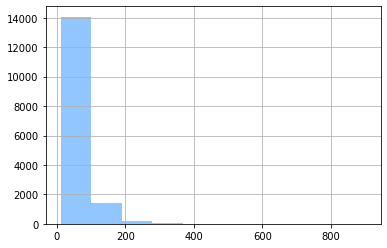

In [99]:
center_piter['total_area'].hist()

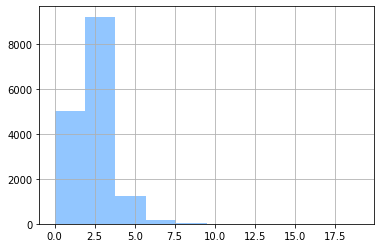

In [100]:
center_piter['rooms'].hist()

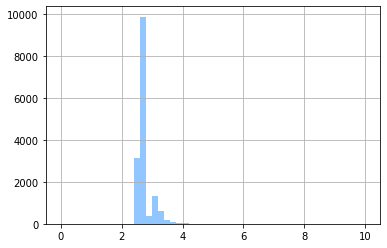

In [101]:
center_piter['ceiling_height'].hist(bins=50, range= (0, 10))

In [102]:
#Зависимость стоимости квартиры от количества комнат
data_price_rooms = data.pivot_table(index = 'price_per_m2', values = ['price', 'rooms'])
print(data_price_rooms.corr())

       price  rooms
price   1.00   0.36
rooms   0.36   1.00


In [103]:
#Зависимость стоимости квартиры от количества комнат ПИТЕР
rooms_center_piter = center_piter.pivot_table(index = 'floor', values = ['price', 'rooms'])
print(rooms_center_piter.corr())

       price  rooms
price   1.00   0.33
rooms   0.33   1.00


In [104]:
#Зависимость стоимости квартиры от этажа
data_price_floor = data.pivot_table(index = 'price_per_m2', values = ['price', 'floor'])
print(data_price_floor.corr())

       floor  price
floor   1.00   0.03
price   0.03   1.00


In [105]:
#Зависимость стоимости квартиры от этажа ПИТЕР
floor_center_piter = center_piter.pivot_table(index = 'rooms', values = ['price', 'floor'])
print(floor_center_piter.corr())

       floor  price
floor   1.00   0.90
price   0.90   1.00


In [106]:
#Зависимость стоимости квартиры от удаленности от центра
data_price_center = data.pivot_table(index = 'price_per_m2', values = ['price', 'citycenters_distance'])
print(data_price_center.corr())

                      citycenters_distance  price
citycenters_distance                  1.00  -0.22
price                                -0.22   1.00


In [107]:
#Зависимость стоимости квартиры от удаленности от центра ПИТЕР
km_center_piter = center_piter.pivot_table(index = 'rooms', values = ['price', 'citycenters_distance'])
print(km_center_piter.corr())

                      citycenters_distance  price
citycenters_distance                  1.00  -0.06
price                                -0.06   1.00


In [108]:
#Зависимость стоимости квартиры от даты размещения
data_price_days = data.pivot_table(index = 'price_per_m2', values = ['price', 'days_exposition'])
print(data_price_days.corr())

                 days_exposition  price
days_exposition             1.00   0.06
price                       0.06   1.00


In [109]:
#Зависимость стоимости квартиры от даты размещения ПИТЕР
days_center_piter = center_piter.pivot_table(index = 'rooms', values = ['price', 'days_exposition'])
print(days_center_piter.corr())

                 days_exposition  price
days_exposition             1.00  -0.12
price                      -0.12   1.00


Вывод по заданию: 
- зависимость цены от количества комнат существует как в пределах Санкт-Петербурга, так и в других населенных пунктах
- В Петербурге наибольшая зависимость цены квартиры от этажа. В других населенных пунктах зависимость не значительная
- Зависимость стоимости квартиры от центра наблюдается как в Питере, там и в других населенных пунктах. 
- Зависимость стоимости квартиры от даты размещения как в Питере, так и в других населенных пунктах незначительная.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
С выводами - ОК<br>
надо учесть только то, что говорил про корреляцию и проверку гипотез....
    
<br>
</font>

### Шаг 5. Общий вывод

### Результаты исследования показали: 
В Санкт-Петербурге: 
1. Существует зависимость стоимости квартиры от количества комнат
2. Наблюдается зависимость между стоимостью квартир от этажа, на котором эта квартира находится. Наименьшая стоимость квартир на первом этаже. 

В других населенных пунктах: 
1. Также существует зависимость стоимости квартиры от количества комнат
2. Наблюдаем также зависимость стоимости квартиры от центра

Пик сделок по проадажам квартир мы наблюдаем в первую неделю размещения объявления, основная активность продаж происходит в первые 50-60 дней.
Продажи квартир лучше всего происходят в апреле, хуже всего в мае-июне. В 2014 году мы наблюдаем всплеск роста цен на квартиры. 

### Рекомендации поиспользованию данного анализа: 
1. Обратить внимание на заполнение данных клиентом (огромное количество пропусков), возможно программе стоит обращать внимание на пропуски в важных пунктах (этаж, количество балконов, метраж квартиры) и оповещать пользователя. 
2. Не загружать пользователя вопросами по удаленности квартиры до парков, прудов, человек может элементарно этого не знать (и как мы видим, скорее всего, не знает), из-за чего возникает большое количество пропусков. 
3. Расстояние удобнее изначально считать в киллометрах. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Хорошая точка в конце книги:) <br>
Вы сделали гораздо больше работы, чем описали в конце)<br>
Не надо стесняться своего труда, презентуйте результат смелее:))<br>
Любому заказчику это надо - увидеть смелые, уверенные и объёмные выводы
    
По предложениям:<br>
1.)да, что-то не так с этим полем<br>
2.)это поле заполняется автоматом уже, просто сбои программно<br>
<br>
</font>

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Мария, интереную Вы работу провели.<br><br>
Думаю, что и Вам понравилось вскрывать шаг за шагом данные)<br>
На мой взгляд, навыки которые Вы закрепляете с этой работой, наиважнейшие для дальнейших модельных дел<br>
Предобработка данных, чистка, проверка предположений, графика - архиважно<br>
И у Вас много уже того, как должно быть.<br>

Обратите, пожалуйста, внимание, что выделено цветом в теле проекта.<br>
Будет очень важным скорректировать знания в этих моментах<br>
Т.к., надеюсь смог это донести, коммерческие выводы очень сильно зависят от:<br>
1)сделанных предпосылок!<br>
2)правильно выбранных методов исследования!<br>
<br>

Конечно же много чего можно улучшать и корректировать по коду по самим вычислениям...<br>
Но не думаю, что это есть предмет обсуждения более важный,<br>
чем умение ставить аналитическую задачу и воплощать её в конечном решении<br>
А этот навык Вы смогли показать в этой работе<br>
Остальное, уверен, будете набирать  каждым блоком обучения<br>
(Ещё раз обращаю внимание на жёлтые комментарии):)
 <br>
    
УСПЕХОВ ВАМ В ДАЛЬНЕМ ОБУЧЕНИИ!!!!
  
<br>
</font>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x] "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод